# Wybór największych agentów do modelowania

In [1]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("../data/df_after_EDA.csv", index_col=0)
df.head(3)

,title,text,organisation,date,category,year,month
0,Interoperability of messaging services – a gam...,Interoperability of messaging services is one ...,S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,InfoSociety,2022,3
1,EU market adjusting to lack of sunflower oil f...,"Brussels, March – A month after the invasion...",FEDIOL - The EU Vegetable Oil and Proteinmeal ...,2022-03-24 23:00:00+00:00,Agriculture & Food,2022,3
2,S&Ds welcome the use of cohesion funds in EU r...,The Socialists and Democrats in the European P...,S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,Euro & Finance,2022,3


## Liczność artykułów dla każdej organizacji

In [10]:
import seaborn as sns

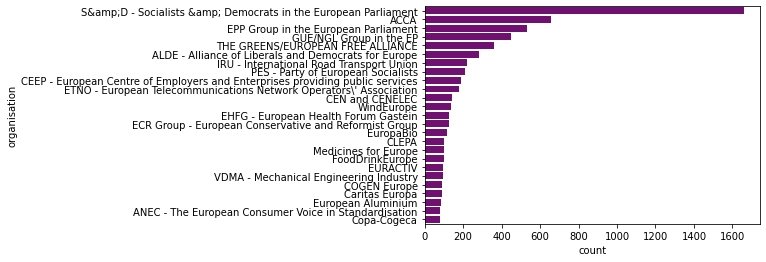

In [15]:
ax=sns.countplot(y='organisation', data=df,
              order=df.organisation.value_counts().iloc[:25].index,
             color='purple')

In [39]:
df.organisation.value_counts().iloc[:25] 

S&amp;D - Socialists &amp; Democrats in the European Parliament                  1658
ACCA                                                                              657
EPP Group in the European Parliament                                              530
GUE/NGL Group in the EP                                                           451
THE GREENS/EUROPEAN FREE ALLIANCE                                                 359
ALDE - Alliance of Liberals and Democrats for Europe                              284
IRU - International Road Transport Union                                          218
PES - Party of European Socialists                                                212
CEEP - European Centre of Employers and Enterprises providing public services     187
ETNO - European Telecommunications Network Operators\' Association                177
CEN and CENELEC                                                                   144
WindEurope                                            

Dokumenty pochodzą z okresu 15 lat. Dobrze świadczyłoby o organizacji, gdyby opublikowała choć 1 artykuł na rok. Sprawdźmy ile jest takich organizacji.

In [33]:
len(df.organisation.value_counts()[df.organisation.value_counts()>15])

114

Nadal za dużo. Postawmy poprzeczkę wyżej - 1 artykuł / miesiąc.

In [41]:
len(df.organisation.value_counts()[df.organisation.value_counts()>15*12])

9

Za mało. Za duże wymagania. W takim razie wybierzmy organizacje, które opublikowały co najmniej 100 artykułów w ciągu 15 lat.

In [42]:
len(df.organisation.value_counts()[df.organisation.value_counts()>100])

17

Cudnie. Może być.

In [55]:
agents_indexes = df.organisation.value_counts()[df.organisation.value_counts()>100].index
np.array(agents_indexes)

array(['S&amp;D - Socialists &amp; Democrats in the European Parliament',
       'ACCA', 'EPP Group in the European Parliament',
       'GUE/NGL Group in the EP', 'THE GREENS/EUROPEAN FREE ALLIANCE',
       'ALDE - Alliance of Liberals and Democrats for Europe',
       'IRU - International Road Transport Union',
       'PES - Party of European Socialists',
       'CEEP - European Centre of Employers and Enterprises providing public services',
       "ETNO - European Telecommunications Network Operators\\' Association",
       'CEN and CENELEC', 'WindEurope',
       'EHFG - European Health Forum Gastein',
       'ECR Group - European Conservative and Reformist Group',
       'EuropaBio', 'CLEPA', 'Medicines for Europe'], dtype=object)

In [56]:
df_reduced = df[df.organisation.isin(np.array(agents_indexes))]
df_reduced.reset_index(inplace=True, drop=True)
df_reduced

,title,text,organisation,date,category,year,month
0,Interoperability of messaging services – a gam...,Interoperability of messaging services is one ...,S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,InfoSociety,2022,3
1,S&Ds welcome the use of cohesion funds in EU r...,The Socialists and Democrats in the European P...,S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,Euro & Finance,2022,3
2,Roaming calls within the EU remain cheap and i...,The European Parliament has adopted the new ru...,S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,InfoSociety,2022,3
3,S&Ds welcome the Strategic Compass as a big st...,"One month ago, Vladimir Putin gave Russian tro...",S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,Security,2022,3
4,S&Ds: Russia’s war on Ukraine shows we need a ...,Following the criminal Russian invasion agains...,S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-23 23:00:00+00:00,Agriculture & Food,2022,3
...,...,...,...,...,...,...,...
5578,Commission policy strategy out of touch with p...,Responding to the Commission's statement outli...,GUE/NGL Group in the EP,2008-03-13 09:07:50+00:00,EU Priorities 2020,2008,3
5579,New energy and climate package for Europe: The...,It proposes a stable and flexible EU framework...,WindEurope,2008-03-04 15:20:33+00:00,NaN,2008,3
5580,European Parliament’s Hearing on the “Laval ca...,At the exchange of views yesterday between MEP...,CEEP - European Centre of Employers and Enterp...,2008-02-29 09:21:34+00:00,Social Europe & Jobs,2008,2
5581,CEEP wants the mission for flexicurity to have...,After the announcement of the setting up of a ...,CEEP - European Centre of Employers and Enterp...,2008-02-14 15:47:51+00:00,Social Europe & Jobs,2008,2


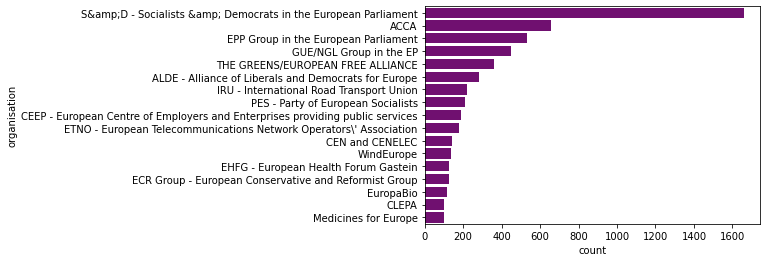

In [57]:
ax=sns.countplot(y='organisation', data=df_reduced,
              order=df_reduced.organisation.value_counts().index,
             color='purple')

Jednak wolę wykorzystać mniejszą liczbę, tj. 9.

In [58]:
agents_indexes = df.organisation.value_counts()[df.organisation.value_counts()>15*12].index
np.array(agents_indexes)

array(['S&amp;D - Socialists &amp; Democrats in the European Parliament',
       'ACCA', 'EPP Group in the European Parliament',
       'GUE/NGL Group in the EP', 'THE GREENS/EUROPEAN FREE ALLIANCE',
       'ALDE - Alliance of Liberals and Democrats for Europe',
       'IRU - International Road Transport Union',
       'PES - Party of European Socialists',
       'CEEP - European Centre of Employers and Enterprises providing public services'],
      dtype=object)

In [59]:
df_reduced = df[df.organisation.isin(np.array(agents_indexes))]
df_reduced.reset_index(inplace=True, drop=True)
df_reduced

,title,text,organisation,date,category,year,month
0,Interoperability of messaging services – a gam...,Interoperability of messaging services is one ...,S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,InfoSociety,2022,3
1,S&Ds welcome the use of cohesion funds in EU r...,The Socialists and Democrats in the European P...,S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,Euro & Finance,2022,3
2,Roaming calls within the EU remain cheap and i...,The European Parliament has adopted the new ru...,S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,InfoSociety,2022,3
3,S&Ds welcome the Strategic Compass as a big st...,"One month ago, Vladimir Putin gave Russian tro...",S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,Security,2022,3
4,S&Ds: Russia’s war on Ukraine shows we need a ...,Following the criminal Russian invasion agains...,S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-23 23:00:00+00:00,Agriculture & Food,2022,3
...,...,...,...,...,...,...,...
4551,Unanimous support for report on organ donation,A report by GUE/NGL MEP Adamos Adamou (Cyprus)...,GUE/NGL Group in the EP,2008-03-28 14:37:11+00:00,Health & Consumers,2008,3
4552,Commission policy strategy out of touch with p...,Responding to the Commission's statement outli...,GUE/NGL Group in the EP,2008-03-13 09:07:50+00:00,EU Priorities 2020,2008,3
4553,European Parliament’s Hearing on the “Laval ca...,At the exchange of views yesterday between MEP...,CEEP - European Centre of Employers and Enterp...,2008-02-29 09:21:34+00:00,Social Europe & Jobs,2008,2
4554,CEEP wants the mission for flexicurity to have...,After the announcement of the setting up of a ...,CEEP - European Centre of Employers and Enterp...,2008-02-14 15:47:51+00:00,Social Europe & Jobs,2008,2


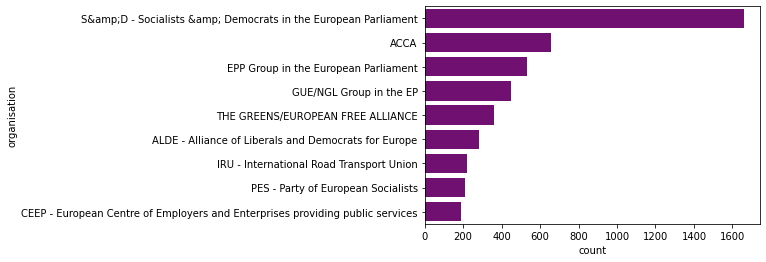

In [60]:
ax=sns.countplot(y='organisation', data=df_reduced,
              order=df_reduced.organisation.value_counts().index,
             color='purple')

## Zapisanie do pliku

In [63]:
df_reduced.to_csv('../data/df_after_EDA_with_agents_reduction.csv')